In [1]:
import tensorflow as tf
from tensorflow import keras
keras.__version__


'2.2.4-tf'

# My Titanic submission to kaggle



In [2]:
#  Import dependendencies
%matplotlib inline

# Start python dependencies
import math, time, datetime, random

# Data manipulation

import numpy as np
import pandas as pd


# Visualization

import matplotlib.pyplot as plt
import seaborn as sns
import missingno

# Preprocessing step
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine Learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# let's be a rebel and ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Lets start with EDA

train_csv = pd.read_csv(r'C:\Users\bhaskar kurasala\Desktop\data sets for practise\Titanic Dataset\titanic\train.csv')
test_csv = pd.read_csv(r'C:\Users\bhaskar kurasala\Desktop\data sets for practise\Titanic Dataset\titanic\test.csv')
gen_sb = pd.read_csv(r'C:\Users\bhaskar kurasala\Desktop\data sets for practise\Titanic Dataset\titanic\gender_submission.csv')

In [4]:
train_csv.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_csv.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
gen_sb.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [7]:
train_csv.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_csv[train_csv['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


Looking into missing Values in columns


<AxesSubplot:>

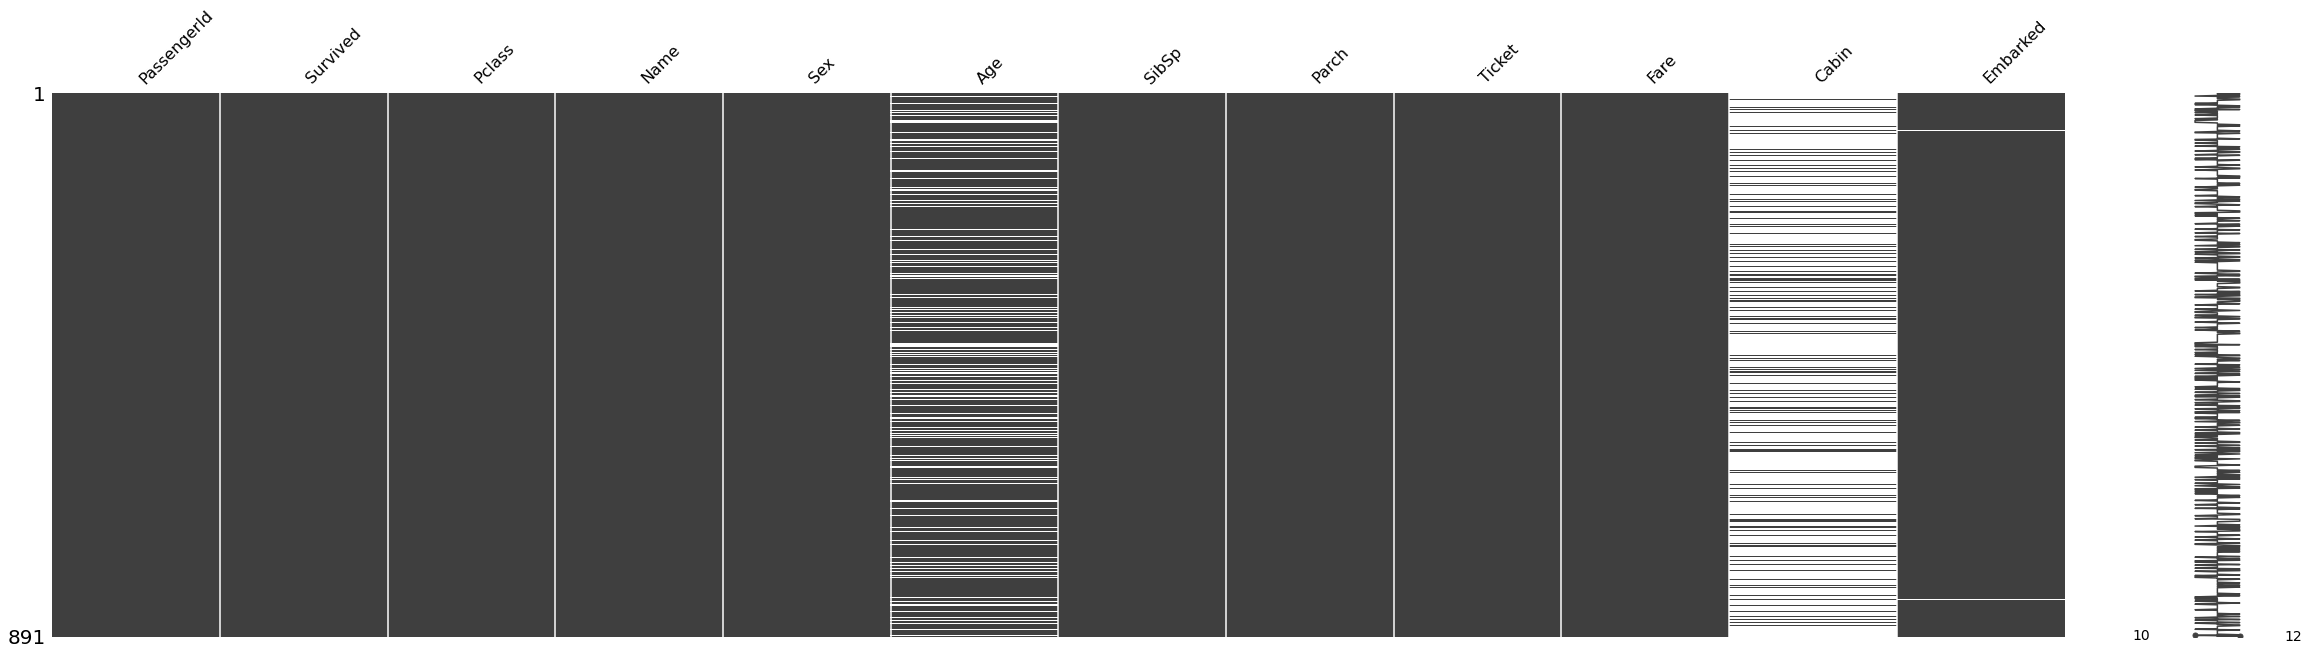

In [9]:
# Plot graphic of missing values

missingno.matrix(train_csv, figsize=(40, 10))

In [10]:
# lets create a function to see the no of missing values in all desired columns

def find_missing_values(df, columns):
    '''
    Finds the number of rows where certain columns have mising values
    ::param_df:: = target dataframe
    ::param_columns:: = list of columns
    '''
    missing_vals = {}
    print('Number of missing or NaN values for each column')
    df_length = len(df)
    for col in columns:
        total_column_values = df[col].value_counts().sum()
        missing_vals[col] = df_length - total_column_values

    return missing_vals
missing_values = find_missing_values(train_csv, columns= train_csv.columns)
missing_values

Number of missing or NaN values for each column


{'PassengerId': 0,
 'Survived': 0,
 'Pclass': 0,
 'Name': 0,
 'Sex': 0,
 'Age': 177,
 'SibSp': 0,
 'Parch': 0,
 'Ticket': 0,
 'Fare': 0,
 'Cabin': 687,
 'Embarked': 2}

Let's do Data Analytics, one for discrete continuous variables and other one is for Exploring continuous variables

In [11]:
df_bin = pd.DataFrame()  # for discrete continuous vaariables
df_con = pd.DataFrame()  # for continuous variables

In [12]:
# Different data types in dataset
train_csv.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Let's Explore each of theese features individually

In [13]:
train_csv.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


0    549
1    342
Name: Survived, dtype: int64


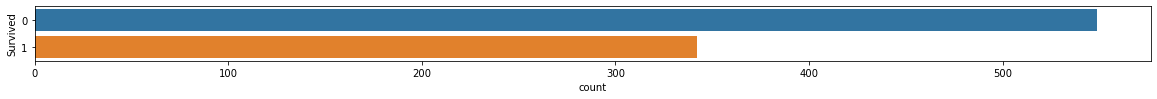

In [14]:
# How many People Survived

fig = plt.figure(figsize=(20, 1))
sns.countplot( y = 'Survived', data= train_csv);
print(train_csv.Survived.value_counts())

In [15]:
# Let's add this to our subset dataframes to see feature by feature

df_bin['Survived'] = train_csv['Survived']
df_con['Survived'] = train_csv['Survived']

In [16]:
df_bin.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [17]:
df_con.head()

,Survived
0,0
1,1
2,1
3,1
4,0


### Feature : Pclass

1 = 1st class, 2 = 2nd class, 3 = 3rd class 

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

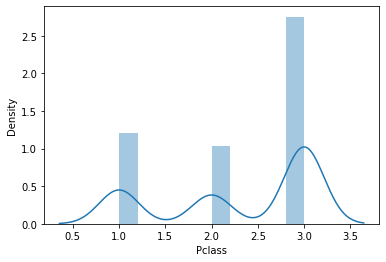

In [18]:
# Let's plaot the distribution for each feature

sns.distplot(train_csv.Pclass)

In [19]:
df_bin['Pclass'] = train_csv['Pclass']
df_con['Pclass'] = train_csv['Pclass']

In [20]:
df_con.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


In [21]:
# Feature Name of the Passenger 
train_csv.Name.value_counts()


Parkes, Mr. Francis "Frank"                     1
Elsbury, Mr. William James                      1
Gustafsson, Mr. Karl Gideon                     1
Palsson, Miss. Stina Viola                      1
Burns, Miss. Elizabeth Margaret                 1
                                               ..
Laleff, Mr. Kristo                              1
Herman, Mrs. Samuel (Jane Laver)                1
Beane, Mr. Edward                               1
Banfield, Mr. Frederick James                   1
Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")    1
Name: Name, Length: 891, dtype: int64

Name is Unoque and so we are moing forward to other Feature

## Feature : Sex

<AxesSubplot:xlabel='count', ylabel='Sex'>

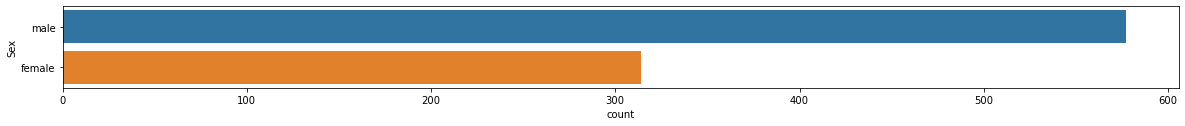

In [22]:
# Let's see the distribution of sex
fig = plt.figure(figsize=(20, 1.5))
sns.countplot(y = 'Sex', data= train_csv)

In [23]:
train_csv.Sex.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [24]:
df_bin['Sex'] = train_csv['Sex']
df_bin['Sex'] = np.where(df_bin['Sex']== 'female', 1, 0)

df_con['Sex'] = train_csv['Sex']

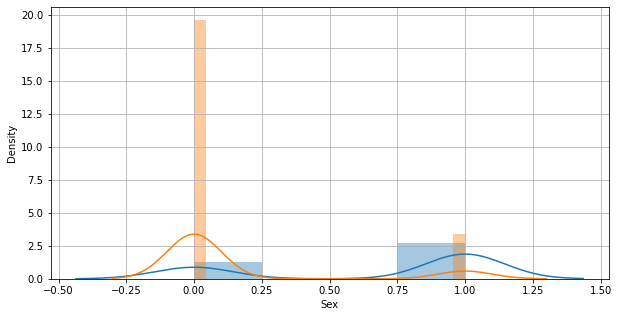

In [25]:
# How does this sex variable look compared to Surviived?
# We can compare this as they both binary

fig = plt.figure(figsize=(10, 5))
plt.grid(True)
sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Sex'], kde_kws={'label': 'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Sex'], kde_kws={'label':'Did not Survived'});


Not more people Survived, but of those survived women are more


## Feature : Age

In [26]:
# How do you fill the values in Age?
train_csv.Age.mean()

df_bin['Age'] = train_csv['Age'].fillna(train_csv.Age.mean())


In [27]:
df_bin.Age.isnull().value_counts()
df_bin

,Survived,Pclass,Sex,Age
0,0,3,0,22.000000
1,1,1,1,38.000000
2,1,3,1,26.000000
3,1,1,1,35.000000
4,0,3,0,35.000000
...,...,...,...,...
886,0,2,0,27.000000
887,1,1,1,19.000000
888,0,3,1,29.699118
889,1,1,0,26.000000


In [28]:
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});

In [29]:
# Feature : Sibsp

train_csv.SibSp.value_counts()


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

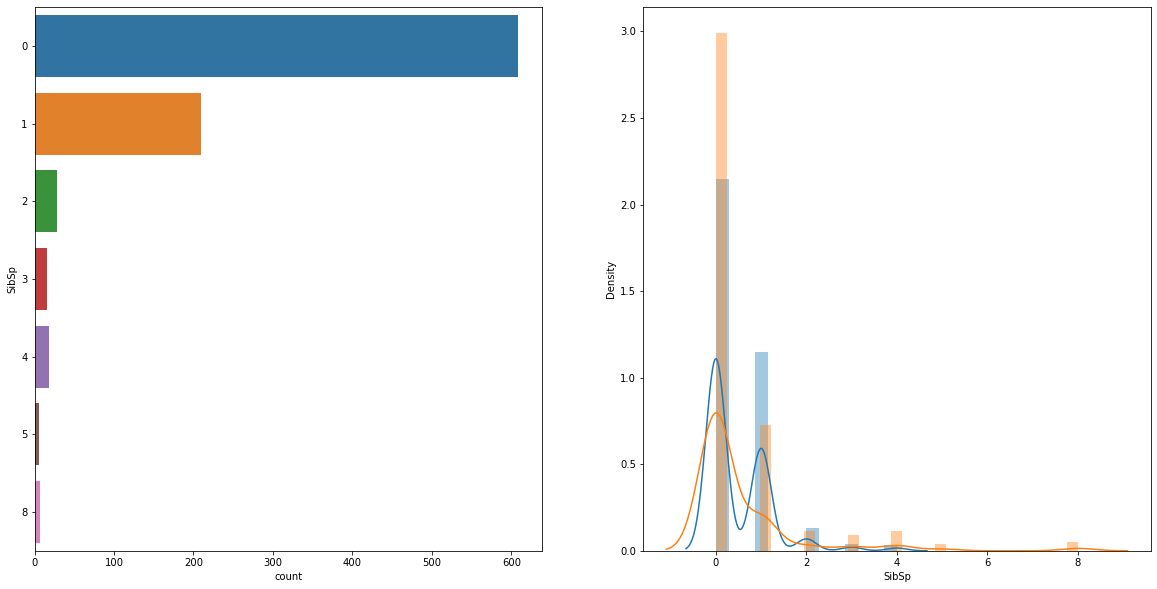

In [30]:
# Let's add SibSp and visualize the count of sibsp and he distribution of the values againt the Survived
df_bin['SibSp'] = train_csv['SibSp']
df_con['SibSp'] = train_csv['SibSp']


plot_count_dist(train_csv,
               bin_df=df_bin,
               label_column='Survived',
               target_column='SibSp',
               figsize=(20,10))

In [31]:
#  Feature : Parch
train_csv.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

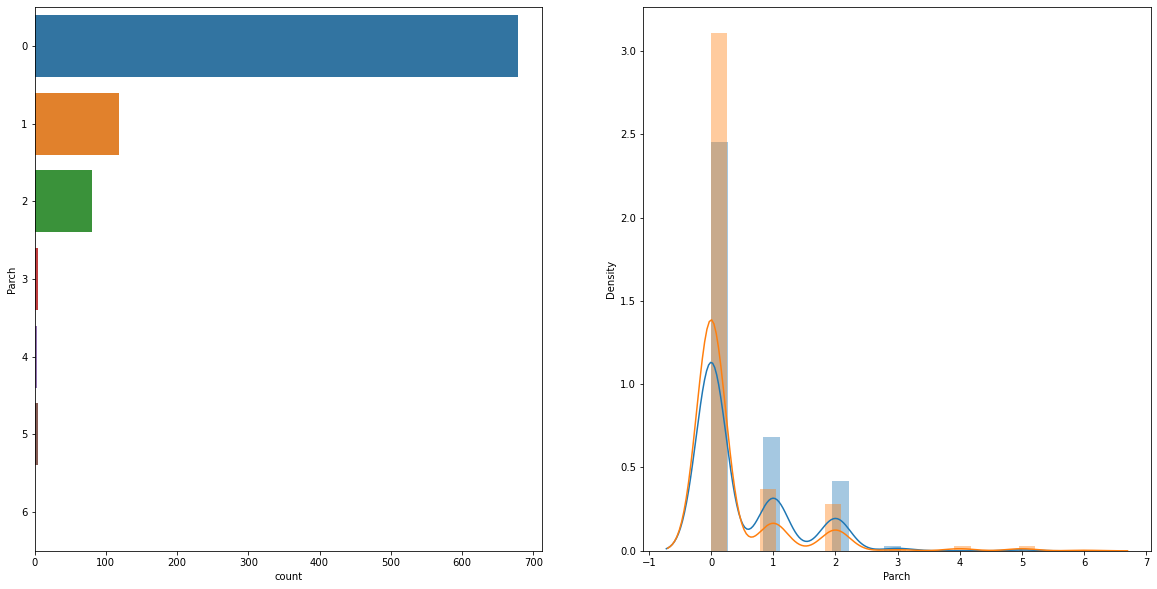

In [32]:
# Let's add Parch and visualize the count of sibsp and he distribution of the values againt the Survived
df_bin['Parch'] = train_csv['Parch']
df_con['Parch'] = train_csv['Parch']


plot_count_dist(train_csv,
               bin_df=df_bin,
               label_column='Survived',
               target_column='Parch',
               figsize=(20,10))

In [33]:
#  Feature : Parch
train_csv.Ticket.value_counts()

1601        7
CA. 2343    7
347082      7
3101295     6
CA 2144     6
           ..
345780      1
349209      1
347466      1
PC 17756    1
348123      1
Name: Ticket, Length: 681, dtype: int64

In [34]:
print('There are {} unique ticket values.'.format(len(train_csv.Ticket.unique())))  # so many variables, very high dimentionality

There are 681 unique ticket values.


In [35]:
#  Feature : Fare
train_csv.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Fare'>

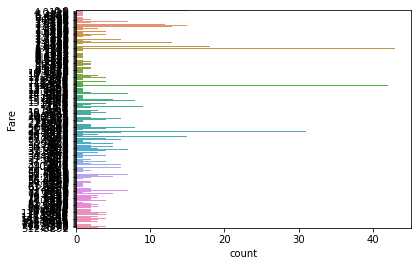

In [36]:
# How many different Fare values are there ?

sns.countplot(y = 'Fare', data = train_csv)


In [37]:
# Let's float is a continuous varible lets add to our Sub data frame

df_con['Fare'] = train_csv['Fare'] # descritised
df_bin['Fare'] = pd.cut(train_csv['Fare'], 5)

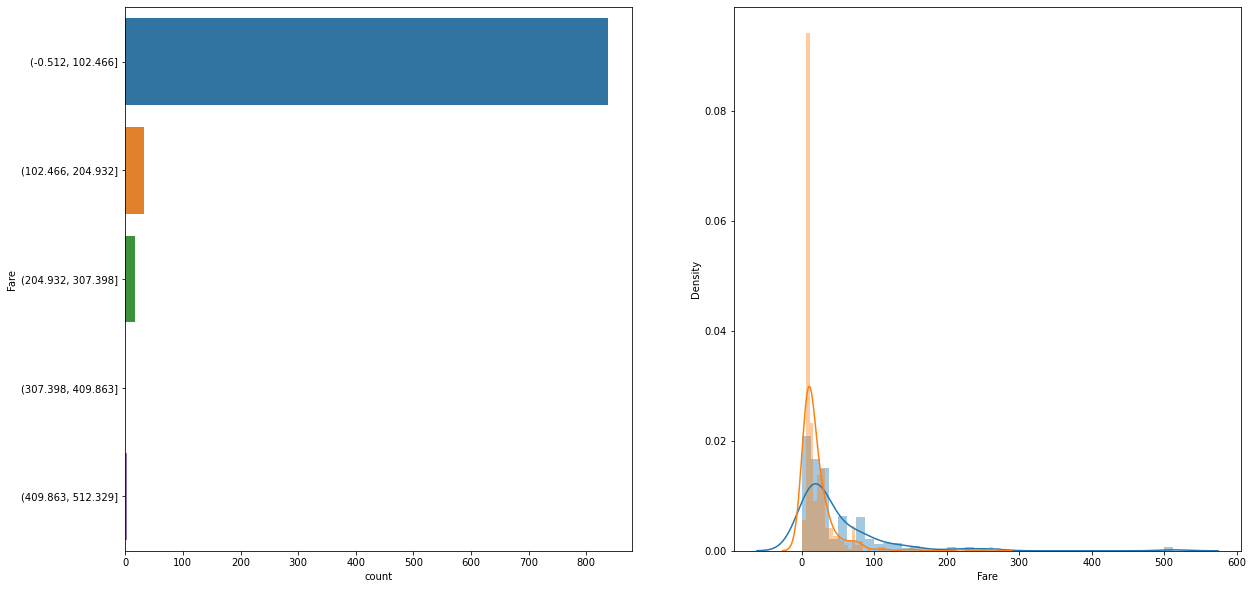

In [38]:
# Let's Visualize it

plot_count_dist(train_csv,bin_df=df_bin,label_column='Survived',target_column='Fare',figsize=(20,10),use_bin_df = True)

In [39]:
# Feature : Cabin
train_csv.Cabin.isnull().sum() # 687 null out of 891, but only 147 different vales
# train_csv.Cabin.value_counts()

687

In [40]:
train_csv.Cabin.value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
C22 C26        3
F2             3
              ..
D21            1
E10            1
C95            1
D11            1
B37            1
Name: Cabin, Length: 147, dtype: int64

In [41]:
# Feature : Embarked
# What kind of values we have? # it is a categorical vlaue

train_csv.Embarked.value_counts().sum()
train_csv.Embarked.value_counts()  # 2 missing values

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Embarked'>

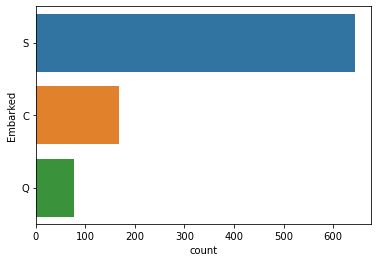

In [42]:
# What do the counts look like?
sns.countplot(y = 'Embarked', data = train_csv)

In [43]:
# As only 2 rows donthave the Embarked value, lets remove the rows from dataframes

# Add Embarked to Dataframes

df_bin['Embarked'] = train_csv['Embarked']
df_con['Embarked'] = train_csv['Embarked']

df_con = df_con.dropna(subset = ['Embarked'])
df_bin = df_bin.dropna(subset = ['Embarked'])

In [44]:
df_bin.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.350956,29.653446,0.524184,0.382452
std,0.486260,0.834700,0.477538,12.968366,1.103705,0.806761
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000


In [45]:
df_bin.Embarked.isnull().sum()

0

In [46]:
df_bin.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,"(-0.512, 102.466]",S
1,1,1,1,38.0,1,0,"(-0.512, 102.466]",C
2,1,3,1,26.0,0,0,"(-0.512, 102.466]",S
3,1,1,1,35.0,1,0,"(-0.512, 102.466]",S
4,0,3,0,35.0,0,0,"(-0.512, 102.466]",S


In [47]:
df_bin_new = df_bin.drop('Age', axis=1)

In [48]:
df_bin_new.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,"(-0.512, 102.466]",S
1,1,1,1,1,0,"(-0.512, 102.466]",C
2,1,3,1,0,0,"(-0.512, 102.466]",S
3,1,1,1,1,0,"(-0.512, 102.466]",S
4,0,3,0,0,0,"(-0.512, 102.466]",S


# Feature Encoding

Now we have 2 dataframes ready. We can encode the features so they are ready to be used for the Machine Learning

In [49]:
# One hot Enccode in Binned Variables, so change then all
one_hot_encode = df_bin_new.columns.to_list()
one_hot_encode  # List of columns
one_hot_encode.remove('Survived')
one_hot_encode  # list of columns with out the target values
df_bin_enc = pd.get_dummies(df_bin_new, columns= one_hot_encode)
df_bin_enc.head()


,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [50]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [51]:
# Label Encode all the continuous Values using LabelEncoder()
df_con_enc = df_con.apply(LabelEncoder().fit_transform)  # def_con_enc = def_con.apply(LabelEncoder().fit_transform)

df_con_enc.head(10)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,2,1,1,0,18,2
1,1,0,0,1,0,207,0
2,1,2,0,0,0,41,2
3,1,0,0,1,0,189,2
4,0,2,1,0,0,43,2
5,0,2,1,0,0,51,1
6,0,0,1,0,0,186,2
7,0,2,1,3,1,124,2
8,1,2,0,0,2,74,2
9,1,1,0,1,0,154,0



### Our data is manipulated and all are numeric only, lets start building Machine Learning Models


Lets seperate the data

In [52]:
# select the dataframe that we want to use first for predictions
selected_df = df_con_enc

In [53]:
selected_df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,2,1,1,0,18,2
1,1,0,0,1,0,207,0
2,1,2,0,0,0,41,2
3,1,0,0,1,0,189,2
4,0,2,1,0,0,43,2


In [54]:
# Split the dataframe  into data and labels

x_train = selected_df.drop('Survived', axis = 1)  # Independent variables
y_train = selected_df.Survived # labels

# shape of data  without labels
print(x_train.head(7))

# shape of labels
print(y_train.head())



   Pclass  Sex  SibSp  Parch  Fare  Embarked
0       2    1      1      0    18         2
1       0    0      1      0   207         0
2       2    0      0      0    41         2
3       0    0      1      0   189         2
4       2    1      0      0    43         2
5       2    1      0      0    51         1
6       0    1      0      0   186         2
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [55]:
# Define a function to fit the machine learning algorithms

# Function that runs the requested algorithm and reurns the accuracy metrics

def fit_ml_algo(algo, x_train, y_train, cv):
    # One pass
    model = algo.fit(x_train, y_train)
    acc = round(model.score(x_train, y_train) * 100, 2)

    # Cross validation
    train_pred = model_selection.cross_val_predict(algo, x_train, y_train, cv=cv, n_jobs = -1)

    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)

    return train_pred, acc, acc_cv

# Logistic Regression

In [56]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), x_train, y_train, 10)

log_time = (time.time() - start_time)
print('Accuracy : %s' % acc_log)
print(' Cross validation Accuracy 10-Fold: %s' % acc_cv_log)
print('Running time : %s' % datetime.timedelta(seconds=log_time))


Accuracy : 79.42
 Cross validation Accuracy 10-Fold: 78.18
Running time : 0:00:06.513974


# KNearest Neighbours

In [57]:
# K - Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), x_train, y_train, 10)

log_time = (time.time() - start_time)
print('Accuracy : %s' % acc_knn)
print(' Cross validation Accuracy 10-Fold: %s' % acc_cv_knn)
print('Running time : %s' % datetime.timedelta(seconds=log_time))

Accuracy : 81.44
 Cross validation Accuracy 10-Fold: 73.68
Running time : 0:00:00.269490


# Gaussian Naive Bayes

In [58]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gau, acc_gau, acc_cv_gau = fit_ml_algo(GaussianNB(), x_train, y_train, 10)

log_time = (time.time() - start_time)
print('Accuracy : %s' % acc_gau)
print(' Cross validation Accuracy 10-Fold: %s' % acc_cv_gau)
print('Running time : %s' % datetime.timedelta(seconds=log_time))

Accuracy : 76.72
 Cross validation Accuracy 10-Fold: 76.38
Running time : 0:00:00.077996


# Linear Support Vector Machines (SVC)


In [59]:
# Support Vector Machines
start_time = time.time()
train_pred_svc, acc_svc, acc_cv_svc = fit_ml_algo(LinearSVC(), x_train, y_train, 10)

log_time = (time.time() - start_time)
print('Accuracy : %s' % acc_svc)
print(' Cross validation Accuracy 10-Fold: %s' % acc_cv_svc)
print('Running time : %s' % datetime.timedelta(seconds=log_time))

Accuracy : 67.83
 Cross validation Accuracy 10-Fold: 70.08
Running time : 0:00:00.285115


# Stichastic Gradient Descent

In [60]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgrd, acc_sgrd, acc_cv_sgrd = fit_ml_algo(SGDClassifier(), x_train, y_train, 10)

log_time = (time.time() - start_time)
print('Accuracy : %s' % acc_sgrd)
print(' Cross validation Accuracy 10-Fold: %s' % acc_cv_sgrd)
print('Running time : %s' % datetime.timedelta(seconds=log_time))

Accuracy : 59.51
 Cross validation Accuracy 10-Fold: 64.0
Running time : 0:00:00.175954


# Decision Tree Classifier

In [61]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), x_train, y_train, 10)

log_time = (time.time() - start_time)
print('Accuracy : %s' % acc_dt)
print(' Cross validation Accuracy 10-Fold: %s' % acc_cv_dt)
print('Running time : %s' % datetime.timedelta(seconds=log_time))

Accuracy : 92.46
 Cross validation Accuracy 10-Fold: 79.42
Running time : 0:00:00.128820


# Gradient Boost Trees

In [62]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), x_train, y_train, 10)

log_time = (time.time() - start_time)
print('Accuracy : %s' % acc_gbt)
print(' Cross validation Accuracy 10-Fold: %s' % acc_cv_gbt)
print('Running time : %s' % datetime.timedelta(seconds=log_time))

Accuracy : 86.39
 Cross validation Accuracy 10-Fold: 81.1
Running time : 0:00:00.703433


# CatBoost Algorithm

state-of-art algorithm that is gradient Boosting on Decision trees


In [63]:
x_train.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,2,1,1,0,18,2
1,0,0,1,0,207,0
2,2,0,0,0,41,2
3,0,0,1,0,189,2
4,2,1,0,0,43,2


In [64]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [65]:
# Define categorical features for catboost model
cat_features = np.where(x_train.dtypes != np.float)[0]
cat_features

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [66]:
# It means that catboost has pcked up all the variables except Fare 

# Using catboost Pool() to pool together the training data and categorical feature 
train_pool = Pool(x_train, y_train, cat_features)

In [67]:
# Catbooost model definitions
catboost_model = CatBoostClassifier(iterations = 1000, custom_loss=['Accuracy'], loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool, plot = True)

# catBoost accuracy
acc_catboost = round(catboost_model.score(x_train, y_train) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.009797
0:	learn: 0.6873671	total: 124ms	remaining: 2m 3s
1:	learn: 0.6820241	total: 162ms	remaining: 1m 20s
2:	learn: 0.6762783	total: 179ms	remaining: 59.6s
3:	learn: 0.6714483	total: 202ms	remaining: 50.3s
4:	learn: 0.6662935	total: 233ms	remaining: 46.3s
5:	learn: 0.6605739	total: 260ms	remaining: 43.1s
6:	learn: 0.6554674	total: 282ms	remaining: 40s
7:	learn: 0.6506963	total: 287ms	remaining: 35.6s
8:	learn: 0.6458177	total: 300ms	remaining: 33.1s
9:	learn: 0.6414410	total: 306ms	remaining: 30.3s
10:	learn: 0.6368860	total: 313ms	remaining: 28.2s
11:	learn: 0.6322663	total: 326ms	remaining: 26.9s
12:	learn: 0.6280648	total: 339ms	remaining: 25.8s
13:	learn: 0.6235529	total: 351ms	remaining: 24.7s
14:	learn: 0.6188170	total: 358ms	remaining: 23.5s
15:	learn: 0.6144028	total: 366ms	remaining: 22.5s
16:	learn: 0.6104758	total: 373ms	remaining: 21.6s
17:	learn: 0.6068397	total: 387ms	remaining: 21.1s
18:	learn: 0.6029228	total: 401ms	remaining: 20.7s
19:	learn: 0

171:	learn: 0.4181256	total: 1.8s	remaining: 8.67s
172:	learn: 0.4177366	total: 1.81s	remaining: 8.65s
173:	learn: 0.4173402	total: 1.82s	remaining: 8.62s
174:	learn: 0.4169801	total: 1.83s	remaining: 8.64s
175:	learn: 0.4166223	total: 1.84s	remaining: 8.62s
176:	learn: 0.4164220	total: 1.85s	remaining: 8.58s
177:	learn: 0.4161651	total: 1.87s	remaining: 8.64s
178:	learn: 0.4158213	total: 1.88s	remaining: 8.62s
179:	learn: 0.4152046	total: 1.89s	remaining: 8.62s
180:	learn: 0.4148948	total: 1.9s	remaining: 8.6s
181:	learn: 0.4144610	total: 1.91s	remaining: 8.58s
182:	learn: 0.4143226	total: 1.91s	remaining: 8.54s
183:	learn: 0.4139860	total: 1.93s	remaining: 8.54s
184:	learn: 0.4134430	total: 1.93s	remaining: 8.52s
185:	learn: 0.4131631	total: 1.94s	remaining: 8.5s
186:	learn: 0.4128461	total: 1.96s	remaining: 8.53s
187:	learn: 0.4126852	total: 1.97s	remaining: 8.51s
188:	learn: 0.4125488	total: 1.98s	remaining: 8.48s
189:	learn: 0.4123185	total: 1.98s	remaining: 8.45s
190:	learn: 0.41

342:	learn: 0.3762779	total: 3.21s	remaining: 6.15s
343:	learn: 0.3762727	total: 3.22s	remaining: 6.13s
344:	learn: 0.3759843	total: 3.23s	remaining: 6.12s
345:	learn: 0.3758035	total: 3.24s	remaining: 6.12s
346:	learn: 0.3756010	total: 3.24s	remaining: 6.11s
347:	learn: 0.3755324	total: 3.25s	remaining: 6.09s
348:	learn: 0.3753875	total: 3.26s	remaining: 6.08s
349:	learn: 0.3750168	total: 3.27s	remaining: 6.07s
350:	learn: 0.3749167	total: 3.28s	remaining: 6.06s
351:	learn: 0.3748073	total: 3.29s	remaining: 6.05s
352:	learn: 0.3744955	total: 3.29s	remaining: 6.04s
353:	learn: 0.3743587	total: 3.3s	remaining: 6.03s
354:	learn: 0.3742731	total: 3.31s	remaining: 6.02s
355:	learn: 0.3738997	total: 3.32s	remaining: 6.01s
356:	learn: 0.3737433	total: 3.33s	remaining: 6s
357:	learn: 0.3736547	total: 3.34s	remaining: 5.99s
358:	learn: 0.3734655	total: 3.35s	remaining: 5.98s
359:	learn: 0.3734489	total: 3.35s	remaining: 5.96s
360:	learn: 0.3734099	total: 3.37s	remaining: 5.96s
361:	learn: 0.37

501:	learn: 0.3544831	total: 5.21s	remaining: 5.17s
502:	learn: 0.3544262	total: 5.22s	remaining: 5.16s
503:	learn: 0.3543220	total: 5.23s	remaining: 5.15s
504:	learn: 0.3542610	total: 5.24s	remaining: 5.14s
505:	learn: 0.3542586	total: 5.25s	remaining: 5.12s
506:	learn: 0.3541593	total: 5.26s	remaining: 5.11s
507:	learn: 0.3541593	total: 5.26s	remaining: 5.09s
508:	learn: 0.3540893	total: 5.27s	remaining: 5.08s
509:	learn: 0.3539563	total: 5.28s	remaining: 5.08s
510:	learn: 0.3537490	total: 5.3s	remaining: 5.07s
511:	learn: 0.3535808	total: 5.31s	remaining: 5.06s
512:	learn: 0.3535631	total: 5.32s	remaining: 5.05s
513:	learn: 0.3534412	total: 5.33s	remaining: 5.04s
514:	learn: 0.3531225	total: 5.34s	remaining: 5.03s
515:	learn: 0.3528104	total: 5.36s	remaining: 5.03s
516:	learn: 0.3526970	total: 5.37s	remaining: 5.01s
517:	learn: 0.3526582	total: 5.37s	remaining: 5s
518:	learn: 0.3525930	total: 5.38s	remaining: 4.99s
519:	learn: 0.3524598	total: 5.4s	remaining: 4.98s
520:	learn: 0.352

661:	learn: 0.3357333	total: 6.78s	remaining: 3.46s
662:	learn: 0.3357201	total: 6.79s	remaining: 3.45s
663:	learn: 0.3356998	total: 6.85s	remaining: 3.46s
664:	learn: 0.3356852	total: 6.86s	remaining: 3.45s
665:	learn: 0.3356836	total: 6.86s	remaining: 3.44s
666:	learn: 0.3356686	total: 6.87s	remaining: 3.43s
667:	learn: 0.3356134	total: 6.89s	remaining: 3.42s
668:	learn: 0.3355980	total: 6.91s	remaining: 3.42s
669:	learn: 0.3355421	total: 6.93s	remaining: 3.41s
670:	learn: 0.3355313	total: 6.93s	remaining: 3.4s
671:	learn: 0.3353951	total: 6.95s	remaining: 3.39s
672:	learn: 0.3353864	total: 6.96s	remaining: 3.38s
673:	learn: 0.3353545	total: 6.97s	remaining: 3.37s
674:	learn: 0.3353021	total: 6.98s	remaining: 3.36s
675:	learn: 0.3351735	total: 7.01s	remaining: 3.36s
676:	learn: 0.3351390	total: 7.03s	remaining: 3.35s
677:	learn: 0.3350478	total: 7.04s	remaining: 3.34s
678:	learn: 0.3348792	total: 7.06s	remaining: 3.34s
679:	learn: 0.3347995	total: 7.07s	remaining: 3.33s
680:	learn: 0

820:	learn: 0.3214882	total: 8.99s	remaining: 1.96s
821:	learn: 0.3213049	total: 8.99s	remaining: 1.95s
822:	learn: 0.3211425	total: 9s	remaining: 1.94s
823:	learn: 0.3208993	total: 9.01s	remaining: 1.92s
824:	learn: 0.3207609	total: 9.02s	remaining: 1.91s
825:	learn: 0.3207394	total: 9.03s	remaining: 1.9s
826:	learn: 0.3206503	total: 9.04s	remaining: 1.89s
827:	learn: 0.3204896	total: 9.06s	remaining: 1.88s
828:	learn: 0.3204896	total: 9.07s	remaining: 1.87s
829:	learn: 0.3204021	total: 9.07s	remaining: 1.86s
830:	learn: 0.3202085	total: 9.1s	remaining: 1.85s
831:	learn: 0.3200531	total: 9.11s	remaining: 1.84s
832:	learn: 0.3199556	total: 9.12s	remaining: 1.83s
833:	learn: 0.3197885	total: 9.14s	remaining: 1.82s
834:	learn: 0.3197235	total: 9.16s	remaining: 1.81s
835:	learn: 0.3195153	total: 9.17s	remaining: 1.8s
836:	learn: 0.3193181	total: 9.19s	remaining: 1.79s
837:	learn: 0.3193059	total: 9.2s	remaining: 1.78s
838:	learn: 0.3193004	total: 9.21s	remaining: 1.77s
839:	learn: 0.31928

985:	learn: 0.3052900	total: 11.7s	remaining: 166ms
986:	learn: 0.3052030	total: 11.7s	remaining: 154ms
987:	learn: 0.3051972	total: 11.7s	remaining: 142ms
988:	learn: 0.3051685	total: 11.7s	remaining: 130ms
989:	learn: 0.3051132	total: 11.7s	remaining: 118ms
990:	learn: 0.3051043	total: 11.7s	remaining: 107ms
991:	learn: 0.3049225	total: 11.8s	remaining: 94.9ms
992:	learn: 0.3048039	total: 11.8s	remaining: 83ms
993:	learn: 0.3047991	total: 11.8s	remaining: 71.2ms
994:	learn: 0.3047576	total: 11.8s	remaining: 59.3ms
995:	learn: 0.3047100	total: 11.8s	remaining: 47.5ms
996:	learn: 0.3046347	total: 11.8s	remaining: 35.6ms
997:	learn: 0.3044994	total: 11.9s	remaining: 23.8ms
998:	learn: 0.3044539	total: 11.9s	remaining: 11.9ms
999:	learn: 0.3044043	total: 11.9s	remaining: 0us


In [68]:
# Perform CatBoost Cross Validation
start_time = time.time()

# set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run  the cross-validation for 10-folds (same as other models)
cv_data = cv(train_pool, cv_params, fold_count=10, plot = True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost results save into a dataframe (cv_data), let's with draw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6765653	test: 0.6765147	best: 0.6765147 (0)	total: 3.37s	remaining: 56m 2s
1:	learn: 0.6597969	test: 0.6605866	best: 0.6605866 (1)	total: 6.96s	remaining: 57m 55s
2:	learn: 0.6457114	test: 0.6466992	best: 0.6466992 (2)	total: 10.2s	remaining: 56m 22s
3:	learn: 0.6317074	test: 0.6325672	best: 0.6325672 (3)	total: 13.9s	remaining: 57m 33s
4:	learn: 0.6188325	test: 0.6200562	best: 0.6200562 (4)	total: 17.8s	remaining: 59m 7s
5:	learn: 0.6073101	test: 0.6085066	best: 0.6085066 (5)	total: 21.2s	remaining: 58m 38s
6:	learn: 0.5958211	test: 0.5974038	best: 0.5974038 (6)	total: 25.9s	remaining: 1h 1m 9s
7:	learn: 0.5851364	test: 0.5873458	best: 0.5873458 (7)	total: 29.5s	remaining: 1h 59s
8:	learn: 0.5753407	test: 0.5778211	best: 0.5778211 (8)	total: 33.8s	remaining: 1h 2m 2s
9:	learn: 0.5663144	test: 0.5695180	best: 0.5695180 (9)	total: 38.1s	remaining: 1h 2m 48s
10:	learn: 0.5577853	test: 0.5616115	best: 0.5616115 (10)	total: 43.3s	remaining: 1h 4m 50s
11:	learn: 0.5494584	test: 

90:	learn: 0.3845850	test: 0.4341500	best: 0.4341500 (90)	total: 5m 47s	remaining: 57m 55s
91:	learn: 0.3839897	test: 0.4340783	best: 0.4340783 (91)	total: 5m 54s	remaining: 58m 17s
92:	learn: 0.3832707	test: 0.4338540	best: 0.4338540 (92)	total: 5m 58s	remaining: 58m 13s
93:	learn: 0.3826550	test: 0.4335151	best: 0.4335151 (93)	total: 6m 1s	remaining: 58m 2s
94:	learn: 0.3821475	test: 0.4332343	best: 0.4332343 (94)	total: 6m 4s	remaining: 57m 51s
95:	learn: 0.3816311	test: 0.4330975	best: 0.4330975 (95)	total: 6m 7s	remaining: 57m 45s
96:	learn: 0.3810912	test: 0.4329381	best: 0.4329381 (96)	total: 6m 10s	remaining: 57m 33s
97:	learn: 0.3804201	test: 0.4328324	best: 0.4328324 (97)	total: 6m 14s	remaining: 57m 22s
98:	learn: 0.3797497	test: 0.4329295	best: 0.4328324 (97)	total: 6m 17s	remaining: 57m 18s
99:	learn: 0.3792626	test: 0.4328337	best: 0.4328324 (97)	total: 6m 21s	remaining: 57m 10s
100:	learn: 0.3787170	test: 0.4324804	best: 0.4324804 (100)	total: 6m 24s	remaining: 57m 2s
10

179:	learn: 0.3460893	test: 0.4291515	best: 0.4289882 (172)	total: 11m 36s	remaining: 52m 52s
180:	learn: 0.3457196	test: 0.4290999	best: 0.4289882 (172)	total: 11m 39s	remaining: 52m 45s
181:	learn: 0.3454269	test: 0.4292086	best: 0.4289882 (172)	total: 11m 42s	remaining: 52m 38s
182:	learn: 0.3451627	test: 0.4292217	best: 0.4289882 (172)	total: 11m 45s	remaining: 52m 30s
183:	learn: 0.3448240	test: 0.4292484	best: 0.4289882 (172)	total: 11m 49s	remaining: 52m 28s
184:	learn: 0.3445558	test: 0.4292804	best: 0.4289882 (172)	total: 11m 53s	remaining: 52m 23s
185:	learn: 0.3442570	test: 0.4292227	best: 0.4289882 (172)	total: 11m 58s	remaining: 52m 23s
186:	learn: 0.3438023	test: 0.4294569	best: 0.4289882 (172)	total: 12m 1s	remaining: 52m 18s
187:	learn: 0.3434566	test: 0.4295208	best: 0.4289882 (172)	total: 12m 6s	remaining: 52m 18s
188:	learn: 0.3431876	test: 0.4295156	best: 0.4289882 (172)	total: 12m 10s	remaining: 52m 12s
189:	learn: 0.3429744	test: 0.4295449	best: 0.4289882 (172)	to

267:	learn: 0.3183594	test: 0.4305036	best: 0.4289882 (172)	total: 17m 28s	remaining: 47m 42s
268:	learn: 0.3180168	test: 0.4305235	best: 0.4289882 (172)	total: 17m 31s	remaining: 47m 36s
269:	learn: 0.3177140	test: 0.4304714	best: 0.4289882 (172)	total: 17m 34s	remaining: 47m 31s
270:	learn: 0.3174999	test: 0.4304596	best: 0.4289882 (172)	total: 17m 37s	remaining: 47m 25s
271:	learn: 0.3172467	test: 0.4306596	best: 0.4289882 (172)	total: 17m 41s	remaining: 47m 19s
272:	learn: 0.3170083	test: 0.4308697	best: 0.4289882 (172)	total: 18m 42s	remaining: 49m 50s
273:	learn: 0.3166499	test: 0.4309950	best: 0.4289882 (172)	total: 18m 50s	remaining: 49m 55s
274:	learn: 0.3163869	test: 0.4309535	best: 0.4289882 (172)	total: 19m 4s	remaining: 50m 16s
275:	learn: 0.3161642	test: 0.4310235	best: 0.4289882 (172)	total: 19m 9s	remaining: 50m 14s
276:	learn: 0.3160116	test: 0.4311454	best: 0.4289882 (172)	total: 19m 14s	remaining: 50m 14s
277:	learn: 0.3156840	test: 0.4312557	best: 0.4289882 (172)	to

355:	learn: 0.2960638	test: 0.4359995	best: 0.4289882 (172)	total: 24m 21s	remaining: 44m 4s
356:	learn: 0.2958761	test: 0.4359457	best: 0.4289882 (172)	total: 24m 24s	remaining: 43m 58s
357:	learn: 0.2956652	test: 0.4357433	best: 0.4289882 (172)	total: 24m 28s	remaining: 43m 52s
358:	learn: 0.2953894	test: 0.4359734	best: 0.4289882 (172)	total: 24m 31s	remaining: 43m 47s
359:	learn: 0.2951844	test: 0.4359987	best: 0.4289882 (172)	total: 24m 34s	remaining: 43m 41s
360:	learn: 0.2949540	test: 0.4360363	best: 0.4289882 (172)	total: 24m 38s	remaining: 43m 36s
361:	learn: 0.2947738	test: 0.4359867	best: 0.4289882 (172)	total: 24m 41s	remaining: 43m 31s
362:	learn: 0.2944839	test: 0.4360165	best: 0.4289882 (172)	total: 24m 45s	remaining: 43m 26s
363:	learn: 0.2942546	test: 0.4360840	best: 0.4289882 (172)	total: 24m 48s	remaining: 43m 20s
364:	learn: 0.2940236	test: 0.4361028	best: 0.4289882 (172)	total: 24m 52s	remaining: 43m 15s
365:	learn: 0.2936990	test: 0.4361144	best: 0.4289882 (172)	t

443:	learn: 0.2763870	test: 0.4382547	best: 0.4289882 (172)	total: 29m 27s	remaining: 36m 53s
444:	learn: 0.2762001	test: 0.4382366	best: 0.4289882 (172)	total: 29m 32s	remaining: 36m 50s
445:	learn: 0.2760337	test: 0.4382851	best: 0.4289882 (172)	total: 29m 36s	remaining: 36m 46s
446:	learn: 0.2758548	test: 0.4381678	best: 0.4289882 (172)	total: 29m 40s	remaining: 36m 42s
447:	learn: 0.2755896	test: 0.4383223	best: 0.4289882 (172)	total: 29m 43s	remaining: 36m 37s
448:	learn: 0.2753773	test: 0.4384391	best: 0.4289882 (172)	total: 29m 46s	remaining: 36m 32s
449:	learn: 0.2751260	test: 0.4386384	best: 0.4289882 (172)	total: 29m 49s	remaining: 36m 27s
450:	learn: 0.2749608	test: 0.4387175	best: 0.4289882 (172)	total: 29m 53s	remaining: 36m 22s
451:	learn: 0.2746524	test: 0.4386528	best: 0.4289882 (172)	total: 29m 57s	remaining: 36m 19s
452:	learn: 0.2744468	test: 0.4388318	best: 0.4289882 (172)	total: 30m 1s	remaining: 36m 15s
453:	learn: 0.2742120	test: 0.4389090	best: 0.4289882 (172)	t

531:	learn: 0.2584387	test: 0.4419595	best: 0.4289882 (172)	total: 34m 32s	remaining: 30m 23s
532:	learn: 0.2582146	test: 0.4420967	best: 0.4289882 (172)	total: 34m 36s	remaining: 30m 19s
533:	learn: 0.2580325	test: 0.4421461	best: 0.4289882 (172)	total: 34m 40s	remaining: 30m 15s
534:	learn: 0.2578585	test: 0.4422275	best: 0.4289882 (172)	total: 34m 44s	remaining: 30m 11s
535:	learn: 0.2576718	test: 0.4424332	best: 0.4289882 (172)	total: 34m 48s	remaining: 30m 8s
536:	learn: 0.2575522	test: 0.4424231	best: 0.4289882 (172)	total: 34m 52s	remaining: 30m 3s
537:	learn: 0.2573740	test: 0.4424253	best: 0.4289882 (172)	total: 34m 56s	remaining: 30m
538:	learn: 0.2572396	test: 0.4423991	best: 0.4289882 (172)	total: 35m	remaining: 29m 56s
539:	learn: 0.2570756	test: 0.4424831	best: 0.4289882 (172)	total: 35m 4s	remaining: 29m 52s
540:	learn: 0.2568675	test: 0.4425085	best: 0.4289882 (172)	total: 35m 8s	remaining: 29m 49s
541:	learn: 0.2567178	test: 0.4427059	best: 0.4289882 (172)	total: 35m 1

619:	learn: 0.2425065	test: 0.4463643	best: 0.4289882 (172)	total: 40m 2s	remaining: 24m 32s
620:	learn: 0.2423121	test: 0.4463173	best: 0.4289882 (172)	total: 40m 5s	remaining: 24m 28s
621:	learn: 0.2421476	test: 0.4461528	best: 0.4289882 (172)	total: 40m 8s	remaining: 24m 23s
622:	learn: 0.2419506	test: 0.4462435	best: 0.4289882 (172)	total: 40m 11s	remaining: 24m 19s
623:	learn: 0.2417539	test: 0.4463629	best: 0.4289882 (172)	total: 40m 15s	remaining: 24m 15s
624:	learn: 0.2415783	test: 0.4463461	best: 0.4289882 (172)	total: 40m 18s	remaining: 24m 11s
625:	learn: 0.2414626	test: 0.4463667	best: 0.4289882 (172)	total: 40m 22s	remaining: 24m 7s
626:	learn: 0.2413235	test: 0.4464179	best: 0.4289882 (172)	total: 40m 26s	remaining: 24m 3s
627:	learn: 0.2411447	test: 0.4464235	best: 0.4289882 (172)	total: 40m 29s	remaining: 23m 59s
628:	learn: 0.2409908	test: 0.4464499	best: 0.4289882 (172)	total: 40m 33s	remaining: 23m 55s
629:	learn: 0.2408575	test: 0.4464213	best: 0.4289882 (172)	total

707:	learn: 0.2279409	test: 0.4512813	best: 0.4289882 (172)	total: 45m 25s	remaining: 18m 44s
708:	learn: 0.2278168	test: 0.4513788	best: 0.4289882 (172)	total: 45m 28s	remaining: 18m 39s
709:	learn: 0.2276394	test: 0.4514794	best: 0.4289882 (172)	total: 45m 32s	remaining: 18m 36s
710:	learn: 0.2274758	test: 0.4515350	best: 0.4289882 (172)	total: 45m 36s	remaining: 18m 32s
711:	learn: 0.2273249	test: 0.4514699	best: 0.4289882 (172)	total: 45m 39s	remaining: 18m 28s
712:	learn: 0.2271615	test: 0.4515997	best: 0.4289882 (172)	total: 45m 43s	remaining: 18m 24s
713:	learn: 0.2269691	test: 0.4515084	best: 0.4289882 (172)	total: 45m 46s	remaining: 18m 20s
714:	learn: 0.2268126	test: 0.4515186	best: 0.4289882 (172)	total: 45m 50s	remaining: 18m 16s
715:	learn: 0.2267223	test: 0.4515456	best: 0.4289882 (172)	total: 45m 54s	remaining: 18m 12s
716:	learn: 0.2265837	test: 0.4516335	best: 0.4289882 (172)	total: 45m 58s	remaining: 18m 8s
717:	learn: 0.2264552	test: 0.4516861	best: 0.4289882 (172)	t

795:	learn: 0.2154130	test: 0.4555850	best: 0.4289882 (172)	total: 50m 51s	remaining: 13m 2s
796:	learn: 0.2152772	test: 0.4556117	best: 0.4289882 (172)	total: 50m 55s	remaining: 12m 58s
797:	learn: 0.2150938	test: 0.4555865	best: 0.4289882 (172)	total: 50m 59s	remaining: 12m 54s
798:	learn: 0.2149593	test: 0.4556131	best: 0.4289882 (172)	total: 51m 2s	remaining: 12m 50s
799:	learn: 0.2147821	test: 0.4557882	best: 0.4289882 (172)	total: 51m 5s	remaining: 12m 46s
800:	learn: 0.2146366	test: 0.4557929	best: 0.4289882 (172)	total: 51m 8s	remaining: 12m 42s
801:	learn: 0.2144832	test: 0.4557881	best: 0.4289882 (172)	total: 51m 12s	remaining: 12m 38s
802:	learn: 0.2143166	test: 0.4557954	best: 0.4289882 (172)	total: 51m 15s	remaining: 12m 34s
803:	learn: 0.2141642	test: 0.4560488	best: 0.4289882 (172)	total: 51m 19s	remaining: 12m 30s
804:	learn: 0.2139816	test: 0.4561890	best: 0.4289882 (172)	total: 51m 23s	remaining: 12m 26s
805:	learn: 0.2138514	test: 0.4562401	best: 0.4289882 (172)	tota

883:	learn: 0.2032606	test: 0.4606127	best: 0.4289882 (172)	total: 55m 50s	remaining: 7m 19s
884:	learn: 0.2031616	test: 0.4608191	best: 0.4289882 (172)	total: 55m 53s	remaining: 7m 15s
885:	learn: 0.2029984	test: 0.4608849	best: 0.4289882 (172)	total: 55m 56s	remaining: 7m 11s
886:	learn: 0.2028681	test: 0.4609012	best: 0.4289882 (172)	total: 56m	remaining: 7m 8s
887:	learn: 0.2027166	test: 0.4607900	best: 0.4289882 (172)	total: 56m 3s	remaining: 7m 4s
888:	learn: 0.2026170	test: 0.4608791	best: 0.4289882 (172)	total: 56m 6s	remaining: 7m
889:	learn: 0.2024713	test: 0.4608730	best: 0.4289882 (172)	total: 56m 9s	remaining: 6m 56s
890:	learn: 0.2023234	test: 0.4609853	best: 0.4289882 (172)	total: 56m 12s	remaining: 6m 52s
891:	learn: 0.2022660	test: 0.4610537	best: 0.4289882 (172)	total: 56m 17s	remaining: 6m 48s
892:	learn: 0.2021801	test: 0.4612252	best: 0.4289882 (172)	total: 56m 20s	remaining: 6m 45s
893:	learn: 0.2020615	test: 0.4611900	best: 0.4289882 (172)	total: 56m 24s	remainin

972:	learn: 0.1926123	test: 0.4645376	best: 0.4289882 (172)	total: 1h 51s	remaining: 1m 41s
973:	learn: 0.1925023	test: 0.4644942	best: 0.4289882 (172)	total: 1h 55s	remaining: 1m 37s
974:	learn: 0.1924091	test: 0.4645621	best: 0.4289882 (172)	total: 1h 58s	remaining: 1m 33s
975:	learn: 0.1922806	test: 0.4646532	best: 0.4289882 (172)	total: 1h 1m 2s	remaining: 1m 30s
976:	learn: 0.1921567	test: 0.4646880	best: 0.4289882 (172)	total: 1h 1m 5s	remaining: 1m 26s
977:	learn: 0.1920785	test: 0.4647442	best: 0.4289882 (172)	total: 1h 1m 9s	remaining: 1m 22s
978:	learn: 0.1919600	test: 0.4650260	best: 0.4289882 (172)	total: 1h 1m 13s	remaining: 1m 18s
979:	learn: 0.1918374	test: 0.4651240	best: 0.4289882 (172)	total: 1h 1m 16s	remaining: 1m 15s
980:	learn: 0.1917498	test: 0.4650614	best: 0.4289882 (172)	total: 1h 1m 21s	remaining: 1m 11s
981:	learn: 0.1916005	test: 0.4651059	best: 0.4289882 (172)	total: 1h 1m 25s	remaining: 1m 7s
982:	learn: 0.1915061	test: 0.4651610	best: 0.4289882 (172)	tot

In [69]:
# Print out the catboost model metrics
print('-----CatBoost Metrics-----')
print('Accuracy: {}'.format(acc_catboost))
print('Accuracy CV 10-Fold {}'.format(acc_cv_catboost))
print('Running Time: {}'.format(datetime.timedelta(seconds=catboost_time)))

-----CatBoost Metrics-----
Accuracy: 88.08
Accuracy CV 10-Fold 81.32
Running Time: 1:02:27.203540


# Model Results

## Regular accuracy scores

In [71]:
models = pd.DataFrame({
    'model': ['KNN','Logistic Regression', 'Naive Bayes', 'Stocastic Gradient Decent', 'Linear SVC',
    'Decision Tree', 'Gradient Boosting Trees',
    'CatBoost'],
    'Score' : [
        acc_knn,
        acc_log,
        acc_gau,
        acc_sgrd,
        acc_svc,
        acc_dt,
        acc_gbt,
        acc_catboost
    ]
})

print('---- Regular Acuracy Scores -----')
models.sort_values(by='Score', ascending = False)

---- Regular Acuracy Scores -----


,model,Score
5,Decision Tree,92.46
7,CatBoost,88.08
6,Gradient Boosting Trees,86.39
0,KNN,81.44
1,Logistic Regression,79.42
2,Naive Bayes,76.72
4,Linear SVC,67.83
3,Stocastic Gradient Decent,59.51


## Cross Validation Accuracy

In [72]:
cv_models = pd.DataFrame({
    'model': ['KNN','Logistic Regression', 'Naive Bayes', 'Stocastic Gradient Decent', 'Linear SVC',
    'Decision Tree', 'Gradient Boosting Trees',
    'CatBoost'],
    'Score' : [
        acc_cv_knn,
        acc_cv_log,
        acc_cv_gau,
        acc_cv_sgrd,
        acc_cv_svc,
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_catboost
    ]
})

print('---- Cross - Validation Acuracy Scores -----')
cv_models.sort_values(by='Score', ascending = False)

---- Cross - Validation Acuracy Scores -----


,model,Score
7,CatBoost,81.32
6,Gradient Boosting Trees,81.10
5,Decision Tree,79.42
1,Logistic Regression,78.18
2,Naive Bayes,76.38
0,KNN,73.68
4,Linear SVC,70.08
3,Stocastic Gradient Decent,64.00


# Feature importance

To show how much each feature contributed to your model

In [73]:
# Feature importance
def feature_importance(model, data):
    '''
    Function to show which features are most important in the model.
    ::params_model:: Which model to use?
    ::params_data:: what data to use?
    '''
    fea_imp = pd.DataFrame({'imp': model.features_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending = [True, False]).iloc[-30:]
    _ = fea_imp.plot(kind = 'barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp
    # plt.savefig('catboost_feature_importance.png')


In [ ]:
# plot the feature importance scores

feature_importance(catboost_model, x_train)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\bhaskar kurasala\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-74-7dc1e676ff2b>", line 3, in <module>
    feature_importance(catboost_model, x_train)
  File "<ipython-input-73-f42e8cfbe392>", line 8, in feature_importance
    fea_imp = pd.DataFrame({'imp': model.features_importances_, 'col': data.columns})
AttributeError: 'CatBoostClassifier' object has no attribute 'features_importances_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\bhaskar kurasala\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'AttributeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent 

# Precision and Recall

In [ ]:
metrics = ['Precision', 'Recall', 'F1', 'AUC']

eval_metrics = catboost_model.eval_metrics(train_pool, metrics = metrics, plot = True)

for metric in meetrics:
    print(str(metric)+' : {}'.format(np.mean(eval_metrics[metric])))

ERROR! Session/line number was not unique in database. History logging moved to new session 304


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\bhaskar kurasala\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-74-b2c41e2ae62b>", line 5, in <module>
    for metric in meetrics:
NameError: name 'meetrics' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\bhaskar kurasala\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\bhaskar kurasala\Anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1169, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "C:\Users\bhaska


# Submission

In [74]:
# Create a list of columns to be used for the predictions

wanted_test_columns = x_train.columns
wanted_test_columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

ERROR! Session/line number was not unique in database. History logging moved to new session 305


In [75]:
# make a prediction using the catboost on the wantedcolumns
predictions = catboost_model.predict(test_csv[wanted_test_columns].apply(LabelEncoder().fit_transform))

ERROR! Session/line number was not unique in database. History logging moved to new session 306


In [76]:
# Our predictions array is comprised of 0's and 1's (Survived or Did not Survived)
predictions[:20]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1],
      dtype=int64)

In [77]:
# Create a submission data frame and append the relevent columns
submission = pd.DataFrame()
submission['PassengerId'] = test_csv['PassengerId']
submission['Survived'] = predictions
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [ ]:
# What does our submission have to look like?
gender_submission.head()

# We need our submission dataframe to look like above dataframe, so we will turn survived column ino integers
submission['Survived'] = submission['Survived'].astype(int)
print('Converted Survived column to integers.')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\bhaskar kurasala\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-78-884cc359b7dc>", line 2, in <module>
    gender_submission.head()
NameError: name 'gender_submission' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\bhaskar kurasala\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\bhaskar kurasala\Anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1169, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "C:\Us

In [78]:
# Are our Test and submission dataframe the same length?
if len(submission) == len(test_csv):
    print('They are of same length')
else:
    print('Doc mismatched, wont be able tosubmit to kaggle.')

They are of same length
ERROR! Session/line number was not unique in database. History logging moved to new session 308


In [81]:
# Convert submission dataframe to csv for submission to csv for kaggle submissions
submission.to_csv(r'C:\Users\bhaskar kurasala\Desktop\data sets for practise\Titanic Dataset\titanic\submission.csv', index = False)
print('Submission is Ready!!!')

# # finally Check the format
# submission_csv = pd.read_csv('......./submision.csv')
# submission_csv.head()

Submission is Ready!!!
